### Robot Learning

### Assignment 1

Solutions are due on 23.04.2024 before the lecture.

## Task 1.1)

In the game of Tic-Tac-Toe, two players alternate placing crosses and circles on a $3 \times 3$ grid, until one player has a row, column, or diagonal of three own pieces, which is a win.

<center><img src="helpers/tictactoe.png" width="240" height="240"/></center>

In the following tasks, the game state will be encoded by denoting the symbol $X$ by the digit $2$, the symbol $O$ by the digit $0$ and the blank field by the digit $1$. The board is then viewed as a $3 \times 3$ matrix and flattened to a vector with $9$ entries. The entries of this vector are regarded as the digits of base 3 number and finally converted to base 10. Using this number, a table of state values V(s) can be maintained. For example:

$s_{3 \times 3} = \begin{vmatrix}
O &  & O \\
O & X &  \\
X & X & X\\
\end{vmatrix} \leftrightarrow \begin{bmatrix}
0 & 1 & 0 \\
0 & 2 & 1\\
2 & 2 & 2\\
\end{bmatrix} \leftrightarrow 010021222_3 \leftrightarrow 2402_{10} =: E(s_{3 \times 3}) =: s$

Describe an inverse of this map and illustrate the individual steps in a different example leading to a legal board state!

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.

To desribe the inverse of this map I will try to write down the steps to take to come from base 10 to board state
1. Convert base 10 number into base 3 number
2. Considering the mapping we are provided (X -> 2, O -> 0, blank -> 1) I will translate the numbers into symbols.
3. As this representation is in the vector form, I will tranlsate it to matrix form and fill it out in the order how it appears in the vector.

To ensure that a state is legal there are certain rules that I believe must be satisfied:
1. The number of Xs can be equal or just one more than Os, as X starts first and it is turn based game
2. X and O cannot have both winning condition
3. In base 3 form, sequence must contain 9 digits.
But I am not sure if there is a way to pick a sequence to illustrate it in a different example that leads to a legal board state. Thus I will try to pick a legal state, turn it into encoded version and present here the reverse.
I chose a full board with a draw at the terminal state.

$ 2114_{10} \leftrightarrow 002220022_{3}\leftrightarrow \begin{bmatrix}
0 & 0 & 2 \\
2 & 2 & 0\\
0 & 2 & 2\\
\end{bmatrix} \leftrightarrow \begin{vmatrix}
O & O & X \\
X & X & O \\
O & X & X \\
\end{vmatrix}
$  
As per my requriements:
1. Xs are 5 and Os are 4. Satisfied
2. X and O both do not have winnig condition
3. in base 3 form there are 9 digits

## Task 1.2)

Closely examine the script below, in which two random agents face off in a game of Tic-Tac-Toe.

Create a suitable structure for state values from the perspective of an agent playing crosses and initialize it for all states with $V(s)=0$. Extend the script below to play $num\_episodes=10000$ matches and set $V(s)=1$ when there is a win or $V(s)=0$ when there is a loss or the game ends in a draw, i.e. no further pieces can be placed.

At the end of each game, go through all states that your agent visited in reverse order and set

$V(s) \leftarrow V(s) + 0.2 [ V(s’) - V(s) ]$, where $s’$ is the successor state.

Document $V(s)$ for all nine states where the agent playing crosses can place their first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

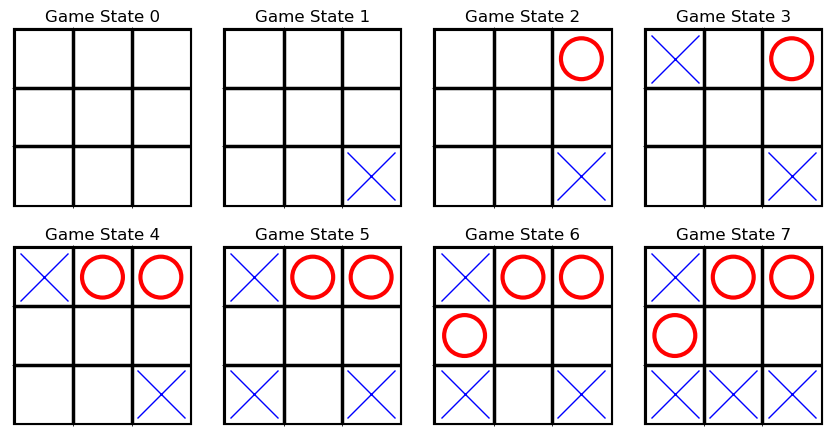

In [1]:
# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory

# this makes sure that all experiments can be reproduced
np.random.seed(2024)

# create a game environment
tictactoe = env()
# reset the game to the empty board - do this before each new episode
tictactoe.reset()

# create a flag which tracks whether the game is over
done = False

# create list to save the trajectory of the agent, start with empty board
states = [np.ones((1,3,3),dtype = int)]

# simulate until the episode is over
while not done:
    # which actions are possible for 'X' at the current state?
    # what are the indices of the states arising from these actions?
    next_state_indices, possible_actions = tictactoe.get_available_actions()
    # select one of the actions randomly
    a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
    # execute the action using the step function, observe next state and reward
    # the reward r is 1 when 'X' wins and 0 otherwise
    s_matrix, r, done = tictactoe.step(a=a_x)
    # save the state in 3x3 matrix form
    states.append(s_matrix)
    # HINT: call tictactoe.state_to_ind(s_matrix) to encode the state
    # we don't need to simulate for 'O' if the game is already over
    if done:
        break
    # simulate the random action of the 'O' player in the same manner
    _, possible_actions = tictactoe.get_available_actions(p=0)
    a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
    s_matrix, r, done = tictactoe.step(a=a_o, player=0)
    states.append(s_matrix)

# use the helper function to display how the episode went
draw_trajectory(np.concatenate(states))

In [2]:
# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory


# Initialize V(s) for all states. Win states have a value of 1, all others start at 0.
# There are 3**9 possible states in Tic-Tac-Toe when considering each space can be X, O, or blank.

# Define the learning rate alpha
alpha = 0.2

# Define the number of episodes
num_episodes = 10000

# Initialize the value function V(s) with zeros for all states
V = np.zeros(3**9)

# Set the value of win states to 1
tictactoe = env()
V[tictactoe.playerWins] = 1

# Function to update V(s) after each game
def update_Vs(states_visited, V, reward):
    states_visited.reverse()
    for i in range(len(states_visited) - 1):
        s = states_visited[i]
        s_prime = states_visited[i + 1]
        V[s] += alpha * (V[s_prime] - V[s])
    # Update the value for the initial state based on the terminal reward
    V[states_visited[-1]] += alpha * (reward - V[states_visited[-1]])

# Run the simulation for num_episodes
for episode in range(num_episodes):
    tictactoe.reset()
    done = False
    states_visited = [tictactoe.state_to_ind(tictactoe.state_mat)]  # Start with the initial empty board index

    while not done:
        next_state_indices, possible_actions = tictactoe.get_available_actions()
        a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        s_matrix, r, done = tictactoe.step(a=a_x)
        states_visited.append(tictactoe.state_to_ind(s_matrix))
        if done:
            break  # Game over, 'X' won or it's a draw
        _, possible_actions = tictactoe.get_available_actions(p=0)
        a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
        s_matrix, r, done = tictactoe.step(a=a_o, player=0)
        states_visited.append(tictactoe.state_to_ind(s_matrix))

    # At the end of each episode, update the value function
    update_Vs(states_visited, V, r)

# Function to get initial state values for 'X' placing the first piece in each cell
def get_initial_state_values(V, env):
    initial_states = []
    initial_values = []
    for i in range(3):
        for j in range(3):
            state_mat = np.ones((3,3), dtype=int)
            state_mat[i, j] = 2  # 'X' places the first piece
            state_ind = env.state_to_ind(state_mat)
            initial_states.append(state_mat)
            initial_values.append(V[state_ind])
    return initial_states, initial_values

# Get the values for the nine starting positions
initial_states, initial_values = get_initial_state_values(V, tictactoe)
for state, value in zip(initial_states, initial_values):
    state_str = '\n'.join(['| '.join(['X' if cell == 2 else ' ' if cell == 1 else 'O' for cell in row]) for row in state])
    print(f"Initial State:\n{state_str}\nValue: {value[0]:.6f}\n{'-'*20}")


Initial State:
X|  |  
 |  |  
 |  |  
Value: 0.525304
--------------------
Initial State:
 | X|  
 |  |  
 |  |  
Value: 0.435524
--------------------
Initial State:
 |  | X
 |  |  
 |  |  
Value: 0.468923
--------------------
Initial State:
 |  |  
X|  |  
 |  |  
Value: 0.519010
--------------------
Initial State:
 |  |  
 | X|  
 |  |  
Value: 0.627432
--------------------
Initial State:
 |  |  
 |  | X
 |  |  
Value: 0.567063
--------------------
Initial State:
 |  |  
 |  |  
X|  |  
Value: 0.499794
--------------------
Initial State:
 |  |  
 |  |  
 | X|  
Value: 0.632226
--------------------
Initial State:
 |  |  
 |  |  
 |  | X
Value: 0.474204
--------------------


In [11]:
len(V) / 9


2187.0

In [3]:
initial_states

[array([[2, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]),
 array([[1, 2, 1],
        [1, 1, 1],
        [1, 1, 1]]),
 array([[1, 1, 2],
        [1, 1, 1],
        [1, 1, 1]]),
 array([[1, 1, 1],
        [2, 1, 1],
        [1, 1, 1]]),
 array([[1, 1, 1],
        [1, 2, 1],
        [1, 1, 1]]),
 array([[1, 1, 1],
        [1, 1, 2],
        [1, 1, 1]]),
 array([[1, 1, 1],
        [1, 1, 1],
        [2, 1, 1]]),
 array([[1, 1, 1],
        [1, 1, 1],
        [1, 2, 1]]),
 array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 2]])]

## Task 1.3)

Replace your agent's arbitrary action selection by an epsilon-greedy strategy that with probability $0.92$ places your piece such that $V(s)$ is maximized (break ties randomly) and with probability $0.08$ places your piece uniformly among the empty fields.

Play $100000$ automated games. For every $1000$ games compute the fraction of games that your player won and document this learning curve!

Again document $V(s)$ for all nine states where you can place your first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

In [1]:
# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory


# Initialize V(s) for all states. Win states have a value of 1, all others start at 0.
# There are 3**9 possible states in Tic-Tac-Toe when considering each space can be X, O, or blank.

# Define the learning rate alpha
alpha = 0.2

# Define the number of episodes
num_episodes = 100000

# Define the epsilon value for epsilon-greedy strategy
epsilon = 0.08

# Initialize the value function V(s) with zeros for all states
V = np.zeros(3**9)

# Set the value of win states to 1
tictactoe = env()
V[tictactoe.playerWins] = 1

# Function to update V(s) after each game
def update_Vs(states_visited, V, reward):
   states_visited.reverse()
   for i in range(len(states_visited) - 1):
       s = states_visited[i]
       s_prime = states_visited[i + 1]
       V[s] += alpha * (V[s_prime] - V[s])
   # Update the value for the initial state based on the terminal reward
   V[states_visited[-1]] += alpha * (reward - V[states_visited[-1]])

# Run the simulation for num_episodes
win_rates = []
for episode in range(num_episodes):
   tictactoe.reset()
   done = False
   states_visited = [tictactoe.state_to_ind(tictactoe.state_mat)]  # Start with the initial empty board index

   while not done:
       # Agent's turn (X)
       next_state_indices, possible_actions = tictactoe.get_available_actions()
       if np.random.uniform() < epsilon:
           # Choose a random action (explore)
           a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
       else:
           # Choose the action that maximizes V(s) (exploit)
           values = [V[next_state_indices[i]] for i in range(len(next_state_indices))]
           max_indices = [i for i, v in enumerate(values) if v == max(values)]
           max_index = np.random.choice(max_indices)
           a_x = tuple(possible_actions[max_index])

       s_matrix, r, done = tictactoe.step(a=a_x)
       states_visited.append(tictactoe.state_to_ind(s_matrix))
       if done:
           break  # Game over, 'X' won or it's a draw

       # Opponent's turn (O)
       _, possible_actions = tictactoe.get_available_actions(p=0)
       a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
       s_matrix, r, done = tictactoe.step(a=a_o, player=0)
       states_visited.append(tictactoe.state_to_ind(s_matrix))

   # At the end of each episode, update the value function
   update_Vs(states_visited, V, r)

   # Compute win rate every 1000 episodes
   if (episode + 1) % 1000 == 0:
       win_rate = sum(V[tictactoe.playerWins]) / len(V[tictactoe.playerWins])
       win_rates.append(win_rate)
       print(f"Episode {episode + 1}: Win rate = {win_rate:.4f}")

# Function to get initial state values for 'X' placing the first piece in each cell
def get_initial_state_values(V, env):
   initial_states = []
   initial_values = []
   for i in range(3):
       for j in range(3):
           state_mat = np.ones((3,3), dtype=int)
           state_mat[i, j] = 2  # 'X' places the first piece
           state_ind = env.state_to_ind(state_mat)
           initial_states.append(state_mat)
           initial_values.append(V[state_ind])
   return initial_states, initial_values

# Get the values for the nine starting positions
initial_states, initial_values = get_initial_state_values(V, tictactoe)
print("\nInitial state values for 'X' placing the first piece:")
for state, value in zip(initial_states, initial_values):
   print(f"State:\n{state}\nValue: {value}")

Episode 1000: Win rate = 0.9831
Episode 2000: Win rate = 0.9715
Episode 3000: Win rate = 0.9627
Episode 4000: Win rate = 0.9578
Episode 5000: Win rate = 0.9558
Episode 6000: Win rate = 0.9546
Episode 7000: Win rate = 0.9522
Episode 8000: Win rate = 0.9499
Episode 9000: Win rate = 0.9482
Episode 10000: Win rate = 0.9468
Episode 11000: Win rate = 0.9456
Episode 12000: Win rate = 0.9439
Episode 13000: Win rate = 0.9433
Episode 14000: Win rate = 0.9426
Episode 15000: Win rate = 0.9417
Episode 16000: Win rate = 0.9408
Episode 17000: Win rate = 0.9398
Episode 18000: Win rate = 0.9395
Episode 19000: Win rate = 0.9388
Episode 20000: Win rate = 0.9384
Episode 21000: Win rate = 0.9385
Episode 22000: Win rate = 0.9382
Episode 23000: Win rate = 0.9379
Episode 24000: Win rate = 0.9375
Episode 25000: Win rate = 0.9371
Episode 26000: Win rate = 0.9369
Episode 27000: Win rate = 0.9366
Episode 28000: Win rate = 0.9364
Episode 29000: Win rate = 0.9363
Episode 30000: Win rate = 0.9361
Episode 31000: Win 

## Task 1.4)

Your trained agent from the previous task should beat the random opponent in most, but not all games. Give two reasons why this is the case. Explain whether your trained agent could plausibly consistently beat a human expert.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

There are two main reasons why the trained agent from the previous task can beat the random opponent in most, but not all games:

1. **Exploration vs. Exploitation Trade-off**: The agent's strategy is based on an epsilon-greedy approach, which means that it will occasionally take random actions (exploration) instead of always choosing the action that maximizes the value function (exploitation). While this exploration is necessary for the agent to learn a good strategy, it can sometimes lead to suboptimal moves that result in losses against the random opponent.

2. **Local Optimum**: The reinforcement learning algorithm used in the previous task (temporal difference learning) may converge to a locally optimal policy, which may not be the globally optimal policy for playing Tic-Tac-Toe. This means that the agent's strategy, while generally good, may not be perfect and could still make mistakes in certain situations.

Regarding whether the trained agent could plausibly consistently beat a human expert, it is unlikely. While the agent has learned a reasonable strategy for playing Tic-Tac-Toe, there are a few reasons why a human expert would likely outperform it:

1. **Perfect Play**: Tic-Tac-Toe is a solved game, meaning that there is a perfect strategy that guarantees a win or a draw for the player who goes first. A human expert who has studied and mastered this perfect strategy would be able to consistently beat the trained agent, which has likely converged to a suboptimal strategy.

2. **Pattern Recognition and Strategic Thinking**: Human experts can recognize patterns and employ strategic thinking that goes beyond the simple value function updates used in the reinforcement learning algorithm. They can anticipate and plan for multiple moves ahead, taking into account the opponent's likely responses, which is a more sophisticated approach than the agent's strategy.

3. **Adaptability**: A human expert can adapt their strategy based on their opponent's playing style or identify weaknesses in the opponent's strategy. The trained agent, on the other hand, has a fixed strategy that may not be able to adjust to the expert's play.

4. **Knowledge and Experience**: Human experts have a deep understanding of the game's principles, strategies, and edge cases, which they have accumulated through extensive study and experience. The trained agent's knowledge is limited to what it has learned through the reinforcement learning process, which may not capture all the nuances of the game.

While the trained agent can perform well against a random opponent or a beginner player, consistently beating a human expert at Tic-Tac-Toe would require a more advanced algorithm or a different approach that can learn and employ the perfect strategy for the game.